# **Conformal Geometric Algebra - Part I**

Conformal geometry studies *conformal structures*, or, *conformal trasnformations*.
Topology is concerned with preserving connectivity (e.g. number of holes), while
conformal geometry is concerned with preserving angles.
Note that "conformity" is a stronger notion than topology, in the sense
that a conformal equivalence implies topological equivalence.

When modelling geometric objects, we can deal with different levels of abstraction. For example,
if we want to create a type "Triangle" that encapsulates all triangles, what is the "correct" equivalence
class to use for such modelling? We know that, from the start, a triangle has three vertices with v1
connected to v2, v2 connected to v3 and v1. From an topological perspective, this view is yet lacking. We don't
know if the triangle is filled or not, hence, it could either have one hole or zero holes. For our case,
let's suppose that a triangle is filled, i.e. it's a simpicial complex of $[v1,v2,v3,[v1,v2], [v2,v3],[v3,v1],[v1,v2,v3]]$.
Once this is defined, then we've characterized triangles topologically. Yet, note that, topologically, a triangle is the same
as a filled circle. Hence, the topology does not actually capture the "shape" of the triangle. This is done with
conformal equivalence.

Hence, besides the simplicial complex description (which is the algebraic topology), we need an algebraic conformal description.
This will be done using Geometric Algebra with the Conformal Model.


## 1. CGA Model

Our goal is to model 3D space in a way that conformal transformations can be algebraically represented. Besides the algebraic
representation, we want our transformations to be covariant, in the sense that applying one conformal transformation preserves
the algebraic structure of our object. This can be achieved by using the Conformal Geometric Algebra Model (CGA).

In this model, we actually represent the existing objects as living in a 5D space,
i.e. we use two extra dimensions in order to better distinguish objects.
For example, a vector in 3D space could be modeled as an array with three entries.
In a similar manner, a point in space could also be modeled in the same way.
The problem becomes that we cannot distinguish between a point and a vector.

Therefore, the Conformal Model in an $\mathbb R^{3+1,1}$ multivector space.
In this model, we thus have the following base vectors $\{e_1,e_2,e_3,e_-, e_+\}$.
The first three are the base vectors of the actual space, while the last two
are special base vectors, where $e_-^2= -1$. Note that, in the Conformal Model, we actually use
a slightly different base. Instead of $e_-$ and $e_+$ we use

$$
    n_o := \frac{e_+ + e_-}{2} , \quad n_\infty = e_- - e_+,
$$
which is the standard used by Dorst and by Fernandes et.al.

Lasenby uses:
$$
    n_\infty := e_+ + e_- , \quad n_o = e_+ - e_-.
$$


> **Warning**
>
> The notation for $n_o$ and $n_\infty$ varies a lot. For example, Leo Dorst calls them
> $o$ and $\infty$, with $o = (e_+ + e_-)/2$ and $\infty = e_- - e_+$. Lasenby uses 
> $n$ and $\bar n$, with $n = e_+ + e_-$ and $\bar n = e_+ - e_-$.
>
> Note that depending on the standard used, the formulas will be different.

In [2]:
using Pkg
Pkg.activate(".")
using CliffordAlgebras
import CliffordAlgebras: basegrade
using LinearAlgebra: norm, normalize, dot
using LaTeXStrings

using Plots
include("./auxiliary.jl")
plotly();

  Activating project at `~/MEGA/EMAP/Julia_Tutorials/GeometricAlgebra`
‚îå Warning: For saving to png with the `Plotly` backend `PlotlyBase` and `PlotlyKaleido` need to be installed.
‚îÇ   err = ArgumentError("Package PlotlyBase not found in current path.\n- Run `import Pkg; Pkg.add(\"PlotlyBase\")` to install the PlotlyBase package.")
‚îî @ Plots /home/davibarreira/.julia/packages/Plots/M4dfL/src/backends.jl:545


In [3]:
cl = CliffordAlgebra(:CGA3D)

e1 = cl.e1
e2 = cl.e2
e3 = cl.e3
e‚Çä = cl.e‚Çä
e‚Çã = cl.e‚Çã
# I  = pseudoscalar(cl)
# Ic = no ‚àß cl.e1 ‚àß cl.e2 ‚àß cl.e3 ‚àß n‚àû; # This is the "correct" pseudoscalar for the conformal model

no  = (cl.e‚Çä + cl.e‚Çã)/2
n‚àû  = cl.e‚Çã - cl.e‚Çä
propertynames(cl)

(:ùüè, :e1, :e2, :e3, :e‚Çä, :e‚Çã, :e1e2, :e1e3, :e2e3, :e1e‚Çä, :e2e‚Çä, :e3e‚Çä, :e1e‚Çã, :e2e‚Çã, :e3e‚Çã, :e‚Çäe‚Çã, :e1e2e3, :e1e‚Çäe2, :e1e3e‚Çä, :e2e‚Çäe3, :e1e2e‚Çã, :e1e‚Çãe3, :e2e3e‚Çã, :e1e‚Çäe‚Çã, :e2e‚Çãe‚Çä, :e3e‚Çäe‚Çã, :e1e2e3e‚Çä, :e1e2e‚Çãe3, :e1e2e‚Çäe‚Çã, :e1e3e‚Çãe‚Çä, :e2e3e‚Çäe‚Çã, :e1e2e3e‚Çäe‚Çã)

Note that `cl` is our algebra, and above we have the list of blade bases, which consists in a total
of $2^5 = 32$ blades.

In [4]:
@show cl.e‚Çä ‚ãÖ cl.e‚Çä
@show cl.e‚Çã ‚ãÖ cl.e‚Çã;

cl.e‚Çä ‚ãÖ cl.e‚Çä = +1 ‚àà Cl(4, 1, 0)
cl.e‚Çã ‚ãÖ cl.e‚Çã = -1 ‚àà Cl(4, 1, 0)


## 2. Representing Some Basic Geometric Objects

### 2.1 Points

Now, one of the goals of using our CGA model is to be able to differentiate objects such as points and vectors.
In this model, a point is the same as a *null vector*. Remember, the norm square of a vector
is $\langle v, v \rangle$. Hence, a point is just a vector $v_p$ where $\langle v_p, v_p \rangle = 0$ in our CGA model.

You might wonder if the fact that the norm is zero, if this does not imply that the vector is just the zero vector.
Yet, since $\langle e_-, e_-\rangle = -1$, it turns out we can actually construct non-null vectors.

Consider a vector $\mathbf v \in \mathbb R^3$. We want to apply a function $F: \mathbb R^3 \to \mathbb R^{4,1}$,
such that $F(\mathbf v) \cdot F(\mathbf v) = 0$, i.e. it's a null vector in the CGA model.

Let $\mathbf v = \alpha_1 e_1 + \alpha_2 e_2 + \alpha_3 e_3$, therefore, our function to find null vectors in CGA is:
$$
F(\mathbf v) = n_o + \mathbf v  + \frac{1}{2}(\mathbf v \cdot \mathbf v) n_\infty;
$$

A point $v = F(\mathbf v) $in CGA will have the property that $v \cdot v  = 0$ and
$v \cdot n_\infty = -1.$

Another interesting thing to note is that the inner product between two points will give the square of 
their Euclidean distance over 2, i.e.
$$
F(\mathbf v) \cdot F(\mathbf u) = -\frac{1}{2} (\mathbf u - \mathbf v)^2.
$$

Note,
$$
(\mathbf u - \mathbf v)^2 = (\mathbf u - \mathbf v) \cdot (\mathbf u - \mathbf v) =||\mathbf u - \mathbf v||^2
= d_E^2(\mathbf u, \mathbf v).
$$

We can also define points with a generalized weights, by simply writing:
$$
\alpha p = 
\alpha (no + \mathbf p + \frac{1}{2}(\mathbf p \cdot \mathbf p) n_\infty),
$$
where $\alpha$ is the weight.

In this case, for two points with weights $\alpha$ and $\beta$ we have
$$
p \cdot q = \alpha(no + \mathbf p + \frac{1}{2}(\mathbf p \cdot \mathbf p) n_\infty) \cdot
\beta(no + \mathbf q + \frac{1}{2}(\mathbf q \cdot \mathbf q) n_\infty) = 
-\frac{1}{2}\alpha\beta (\mathbf q - \mathbf p)^2.
$$

In [5]:
# Formula from Dorst
F(x) = no + x + (x ‚ãÖ x) * n‚àû /2
point(x=0,y=0,z=0)  = no + x*cl.e1 + y*cl.e2 + z*cl.e3 + (x^2 + y^2 + z^2) * n‚àû/2

# Point from vector, formula from Lasenby
# F(x) = -no/2 + x + (x ‚ãÖ x)*n‚àû/2

point (generic function with 4 methods)

In [6]:
p = point(1,2,3)
@show p ‚ãÖ n‚àû
@show norm(p) == 0
@show p == F(cl.e1 + 2cl.e2 + 3cl.e3);

p ‚ãÖ n‚àû = -1.0 ‚àà Cl(4, 1, 0)
norm(p) == 0 = true
p == F(cl.e1 + 2 * cl.e2 + 3 * cl.e3) = true


Checking the point distance: 

In [7]:
u = [1,1]
v = [3,2]
pu = point(u...)
pv = point(v...)

-norm_sqr(u - v)/2  ‚âà scalar(pu ‚ãÖ pv)

true

## 2.2 Point Pair

In the Conformal Model, a pair of points can be delt with by simply using the outer product, i.e. $p \wedge q$.
How do we know that this encodes the pair of points? Note that
$X \wedge (p \wedge q)$ is zero only when $X = p$ or $X = q$.

First, consider $p$ and $q$ to be **normalized**.

Given a pair of points $T = p \wedge q$, we might wish to get $p$ and $q$ back.
This can be done by constructing a projection operator.

First, define $G = \frac{T}{||T||}$ where $||T|| = \sqrt{T^2}$. Then
$$
P = \frac{1+G}{2}.
$$
Note that $P^2 = P$.

We can then compute $p$ and $q$ using (from Lasenby "A Covariant Approach to Geometry using Geometric Algebra")

$$
p = - \tilde{P} (T \cdot n_\infty) P\\
q = P (T \cdot n_\infty) \tilde{P}.
$$

In [8]:
p = point(rand(),1,0)
q = point(0,0,0)

T = p ‚àß q
G = T/‚àöscalar(T^2)
Prj = (1+G)/2

@show Prj * ((T) ‚ãÖ n‚àû) * reverse(Prj) ‚âà q
@show -reverse(Prj) * ((T) ‚ãÖ n‚àû) * Prj ‚âà p;

Prj * (T ‚ãÖ n‚àû) * reverse(Prj) ‚âà q = true
-(reverse(Prj)) * (T ‚ãÖ n‚àû) * Prj ‚âà p = true


### 2.4 Flats

A $k$-flat in our Conformal Model is simply an element of the form:

$$
X = \alpha(n_o \wedge p_1 \wedge ... \wedge p_k \wedge n_\infty),
$$
where $p_i$ are points in our model. It can be shown that we can reformulate this flat such that
$\mathbf{A_k} = \alpha \mathbf{p_1}\wedge...\wedge \mathbf{p_k}$

$$
X = n_o \wedge \mathbf{A_k} \wedge n_\infty.
$$

This flat $X$ is a general way of representing the subspace generated by the vectors
$\mathbf{p_1},...,\mathbf{p_k}$ passing through the origin.

The origin of our model is $\mathbf{n}_o$. If we want our subspace to pass through a point $\mathbf p$, we can
translate it using the transformation we are going to show below. After applying this transformation,
it can be shown that a subspace passing thorugh $\mathbf p$ is given simply by

$$
p \wedge \mathbf{A}_k \wedge \mathbf{n}_\infty.
$$

In [9]:
p = point(1,1,0)
q = point(1,0,1)

pv = getblades(p)
qv = getblades(q)

@show no ‚àß (pv ‚àß qv) ‚àß n‚àû == no ‚àß p ‚àß q ‚àß n‚àû;

(no ‚àß (pv ‚àß qv)) ‚àß n‚àû == ((no ‚àß p) ‚àß q) ‚àß n‚àû = true


Given a flat $X$, we might wish to compute some properties, such as the direction, the weight and
the support point, i.e. the point in the flat closest to the origin. Let's do all this using a line as an example.

Using the idea of a flat, we can define a line. Just consider a vector $\mathbf v$ and translate it to a point $p$. 

Another way to construct a line is by considering two points $p$ and $q$ and doing:
$$
l = p \wedge q \wedge n_\infty = p \wedge \mathbf v \wedge n_\infty,
$$
where $\mathbf v = \mathbf q$.

In [11]:
u = cl.e1 + 4cl.e2
p = F(u)

v = -3cl.e1 + cl.e2
q = F(v + u)

l = p ‚àß v ‚àß n‚àû

@show l == p ‚àß q ‚àß n‚àû;

l == (p ‚àß q) ‚àß n‚àû = true


Given a line $l = p \wedge \mathbf q \wedge n_\infty = p \wedge q \wedge n_\infty$,
how do we extract information such as the direction of the line? Note that the direction
of the line is the vector $\mathbf q$. We can get it by applying left contraction
on $n_o$ followed by $n_\infty$.

$$
\mathbf q  = n_\infty \rfloor (n_o \rfloor l).
$$


In [10]:
v == n‚àû ‚®º (no ‚®º l)

true

Note that the weight of the line is already inside $\mathbf q$. Hence, if we want to know
the weight, we can get the norm of the direction vector.

In [11]:
p = point(1,1,0)
v = -1cl.e1
Œ± = 2
l = Œ± * p ‚àß v ‚àß n‚àû

+2.0√óe1e‚Çäe2+2.0√óe1e2e‚Çã+2.0√óe1e‚Çäe‚Çã ‚àà Cl(4, 1, 0)

In [12]:
weight = norm(n‚àû ‚®º (no ‚®º l))
v = n‚àû ‚®º (no ‚®º l)

-2.0√óe1 ‚àà Cl(4, 1, 0)

### 2.5 Flat Dual and Support Point

To define the dual of a flat we need an operator star "$\star$" which
consists in the dual of the Euclidean part of a blade in the Conformal Model. For example,
let $\mathbb R^{3+1,1}$ be the Conformal Model over $\mathbb R^3$. Thus,
the dual of a multivector $X$ is simply $X I$ where $I = e_1 e_2 e_3 n_o n_\infty$ is the pseudoscalar.
Now, let $\mathbf X$ be a blade. The dual Euclidean is:

$$
\mathbf X^\star = \mathbf X \rfloor \mathbf I_3^{-1},
$$
where $\mathbf I_3 = e_1 e_2 e_3$.

Consider now a flat $l = n_o \wedge \mathbf A \wedge n_\infty$. The dual is

$$
l^* = (n_o \wedge \mathbf A \wedge n_\infty)^* = 
\widehat{\mathbf A ^ \star}
$$

> **Warning**. Note that the pseudoscalar of the Conformal Model is $I = n_o \wedge \mathbf I \wedge n_\infty$. This formula
is a bit different from what you get as default in the CliffordAlgebras.jl package. Check below.
> This makes the formula `dual` implemented in the package problematic.
> Hence, we favor the explicit formula $X \rfloor I^{-1}$ instead.

In [13]:
@show no ‚àß cl.e1 ‚àß cl.e2 ‚àß cl.e3 ‚àß n‚àû == pseudoscalar(cl);

# Let's define Ic as the conformal pseudoscalar.
Ic = no ‚àß cl.e1 ‚àß cl.e2 ‚àß cl.e3 ‚àß n‚àû;

cdual(A) = A ‚®º inv(Ic);

(((no ‚àß cl.e1) ‚àß cl.e2) ‚àß cl.e3) ‚àß n‚àû == pseudoscalar(cl) = false


In [14]:
p = point(1,1,0)
q = point(1,0,1)
A = getblades(q) - getblades(p)

l = no ‚àß A ‚àß n‚àû

@show grin(A ‚®º inv(cl.e1e2e3)) == cdual(l);

grin(A ‚®º inv(cl.e1e2e3)) == cdual(l) = true


The formula worked for a flat in the origin. For a flat in a point $p$ we use the fact that dualization is covariant
under versor transformation. Since translation is a versos, then the translation of the dual is equal to the dual
of the translation, hence:

$$
(T_\mathbf p l \tilde{T_\mathbf p})^* = 
T_\mathbf p l^* \tilde{T_\mathbf p} = 
T_\mathbf p \widehat{\mathbf A^\star}  \tilde{T_\mathbf p} = 
- p \rfloor (\mathbf A^\star n_\infty).
$$

In [15]:
edual(A) = A ‚®º inv(cl.e1e2e3);

In [16]:
p = point(1,1,0)
q = point(1,0,1)
A = getblades(q) - getblades(p)

l = no ‚àß A ‚àß n‚àû
lp = p ‚àß A ‚àß n‚àû

Tp = exp(-getblades(p)*n‚àû/2)

@show Tp*l*reverse(Tp) == lp
@show Tp*cdual(l)*reverse(Tp) == cdual(lp)

# The formula
@show cdual(lp) == -p ‚®º (edual(A)*n‚àû)

# Note that the formula from the package does not satisfy
# the covariance
@show Tp * dual(l) * reverse(Tp) == dual(lp);

Tp * l * reverse(Tp) == lp = true
Tp * cdual(l) * reverse(Tp) == cdual(lp) = true
cdual(lp) == -p ‚®º (edual(A) * n‚àû) = true
Tp * dual(l) * reverse(Tp) == dual(lp) = false


Lastly, given a line, we might wish to get the support point, i.e. the point in the line that is closest
to the origin. Let $X$ be our flat (e.g. $X=p \wedge q \wedge n_\infty$):
$$
\text{support point: } \quad \frac{n_o \rfloor X}{X}
$$

This returns the closest point $d$ to $n_o$ that is in the flat $X$. We can alter the reference point
from $n_o$ to any other reference point.

In [17]:
p = point(1,2,0)
v = -0.5cl.e1 + cl.e2

l = no ‚àß v ‚àß n‚àû
@show (no ‚®º l) / l ‚âà no

@show -n‚àû ‚®º l == v ‚àß n‚àû

l = p ‚àß v ‚àß n‚àû

(no ‚®º l) / l ‚âà no = true
-n‚àû ‚®º l == v ‚àß n‚àû = true


+2.0√óe1e‚Çäe2+2.0√óe1e2e‚Çã+0.5√óe1e‚Çäe‚Çã+1.0√óe2e‚Çãe‚Çä ‚àà Cl(4, 1, 0)

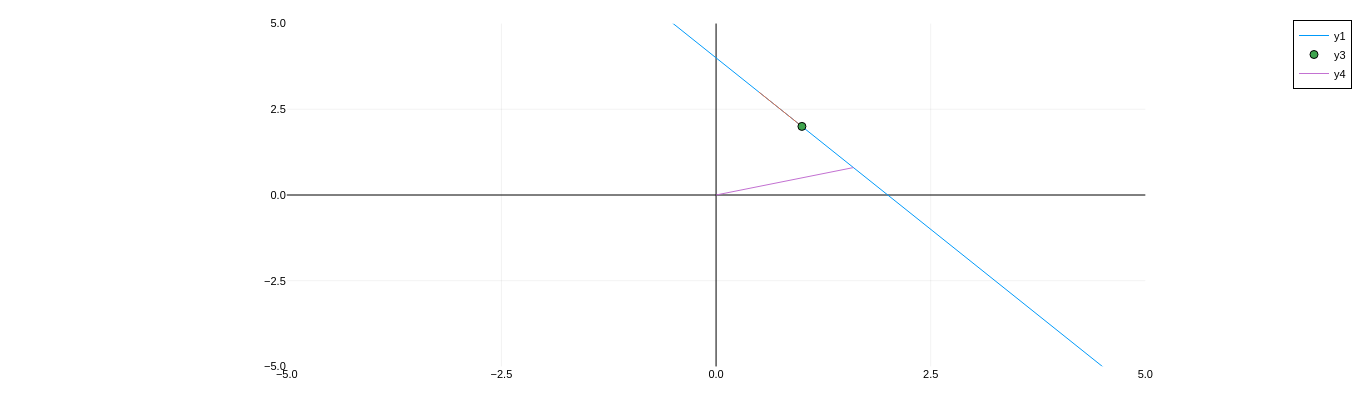

In [18]:
d = getblades((no ‚®º l) / l)

Œ± = 1/v.e1
Œ≤ = -(Œ± * p.e1 - p.e2)
f(x) = x*Œ± + Œ≤
plot(f, framestyle=:zerolines,)
quiver!([p.e1],[p.e2], quiver=([v.e1],[v.e2]), aspect_ratio=1, xlims=(-5,5),ylims=(-5,5))
scatter!([p.e1],[p.e2])
plot!([0,d.e1],[0,d.e2])

While a flat has a supporting point, e.g. $p$, the object $\mathbf A \wedge n_\infty$
is simply a direction.

## 3. Transformations in the Conformal Model

### 3.1 Rotations

The first transformation we deal with are rotations. In the conformal model, a rotation is a rotor.
Remember, a rotor is a transformation
with unit norm constructed via the product of an even number of invertible vectors. The application
of a rotor in the Euclidean Geometry is done via a sandwiching, e.g.
$R x \tilde{R}$.

One can show that $R x n_\infty \tilde{R} = R x \tilde{R} n_\infty$
and $R x n_0 \tilde{R} = R x \tilde{R} n_0$.

Using this fact, we can show that:

$$
R F(\mathbf x) \tilde{R} = F(R \mathbf x \tilde{R}),
$$

which means that a rotor that acts as a rotation in the Euclidean space also does the same in our Conformal Model.

The rotation rotor is simply the geometric product of two unit vector. The angle between them
is $\phi/2$, and by sandwiching the point in the Conformal Model, we get a rotation
of $\phi$ the direction normal to the subspace formed by the wedge product of the two vectors.

For example, consider $\mathbb R^{3+1,1}$. For a rotor $R = \mathbf e_1 \mathbf e_2$, since the angle
between the base vectors is $\pi/2$, if we do $R F(\mathbf x) \tilde{R}$, we'll get
a rotation of $\pi$ around the $z$-axis.

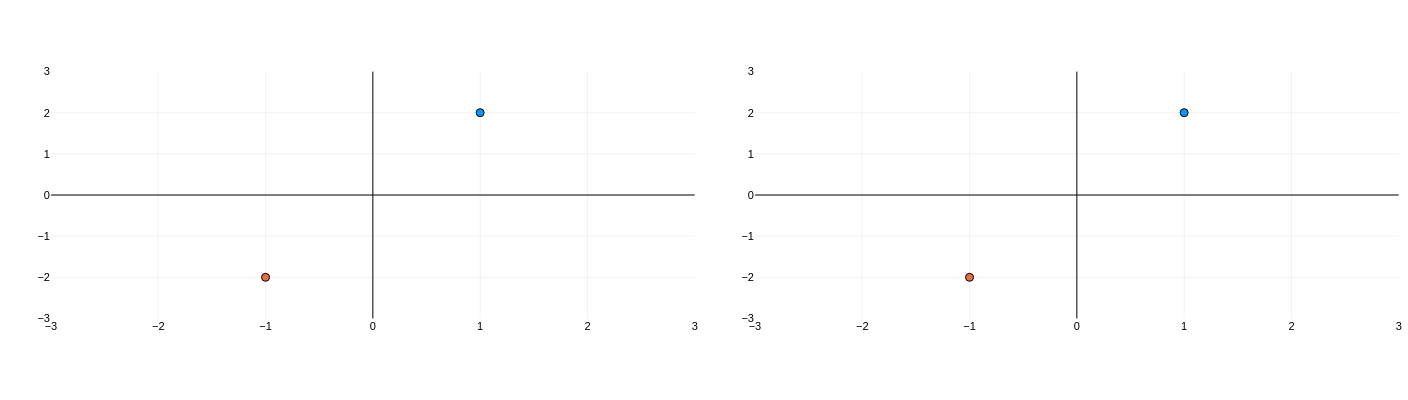

In [19]:
x = cl.e1 + 2cl.e2 + 0cl.e3

R = cl.e1 * cl.e2
# R = (cl.e1/‚àö2 + cl.e2/‚àö2) * cl.e1

Rx = R*x*reverse(R)

Fx  = F(x)
RFx = R*x*reverse(R)

p1 = scatter([x.e1],[x.e2])
p1 = scatter!([Rx.e1],[Rx.e2],
    framestyle=:zerolines,
    legend=false,
    aspect_ratio=1);

p2 = scatter([Fx.e1],[Fx.e2])
p2 = scatter!([RFx.e1],[RFx.e2],
    framestyle=:zerolines,
    legend=false,
    aspect_ratio=1);

plot(p1,p2,xlims=(-3,3),ylims=(-3,3))

In $\mathbb R^{n+1,1}$, all rotors have an exponential representation. We can express the rotation rotor as

$$
R = \exp\left(
-\mathbf I \phi/2
\right),
$$
where $\mathbf I$ is the rotation plane, and $\phi$ is the rotation angle.

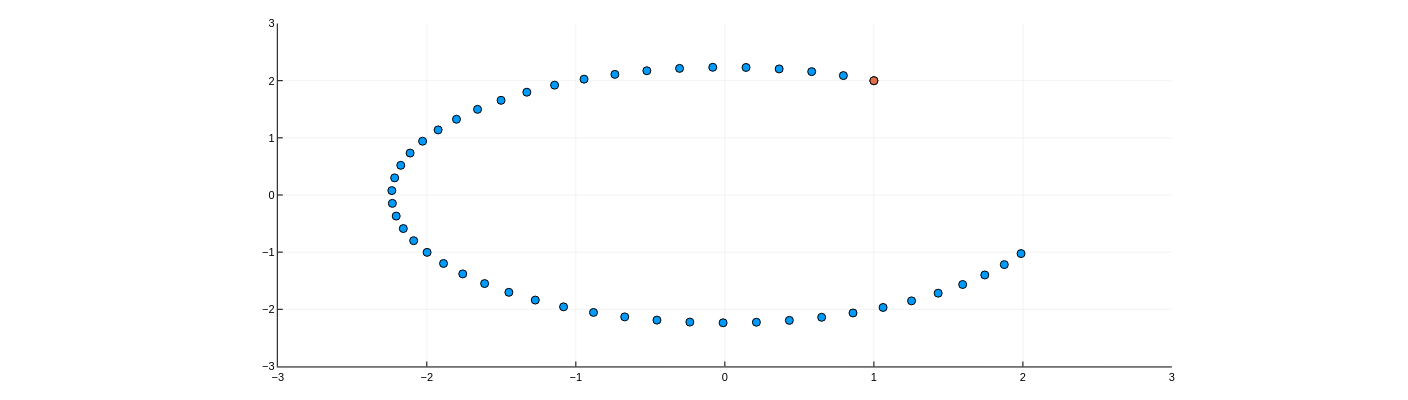

In [20]:
x = cl.e1 + 2cl.e2 + 0cl.e3
Fx  = F(x)

Iblade = cl.e1 ‚àß cl.e2
Rx = []
for œï in 0:0.1:3œÄ/2
    R = exp(-Iblade * œï/2)
    v = R*x*reverse(R)
    push!(Rx,[v.e1, v.e2])
end
Rx = vcat(Rx'...)
scatter(Rx[:,1],Rx[:,2],label="Rx")
scatter!([Fx.e1],[Fx.e2],label="x",
    legend=false,
    xlims=(-3,3),
    ylims=(-3,3),
    aspect_ratio=1
)

Given a rotation $R_{\mathbf I \phi}$ , one might wish
to recover the plane and angle of rotation. This can be accomplished
via the following formulas:

$$
\mathbf I = \frac{\langle R \rangle_2 }{\sqrt{-(\langle R \rangle_2)^2}}
$$

$$
\phi = - 2 \text{atan}\left(
    \frac{\langle R \rangle_2}{\mathbf I}, \langle R \rangle_0
\right).
$$

Just note that the sign for the rotation plane and angle of rotation
might be shifted, since $-\mathbf I, - \phi$ produce the same
motion as $\mathbf I, \phi$.

In [21]:
œï = œÄ
I = cl.e1 ‚àß cl.e2
R  = exp(-I*œï/2)
@show R ‚âà cl.e2 / cl.e1

Ir = grade(R,2)/‚àöscalar(-(grade(R,2)*grade(R,2)))

@show Ir ‚âà -I
@show -2atan(scalar(grade(R,2)/Ir), scalar(R)) ‚âà -œï;

R ‚âà cl.e2 / cl.e1 = true
Ir ‚âà -I = true
-2 * atan(scalar(grade(R, 2) / Ir), scalar(R)) ‚âà -œï = true


## 3.2 Inversion

Next, suppose that we have a point $F(\mathbf x)$. We know that we can invert $\mathbf x$
by 

$$
\mathbf x^{-1} = \frac{\mathbf x}{\mathbf x \mathbf x}.
$$

The way of doing this in our conformal model is by reflecting on the base vector $e$ and normalizing.
$$
F(\mathbf x^{-1}) = \frac{-\mathbf e F(\mathbf x) \mathbf e}{\mathbf x\mathbf x}.
$$

In [22]:
x = cl.e1 + 2cl.e2 + 0cl.e3
F(inv(x)) ‚âà -(cl.e‚Çä * F(x) * cl.e‚Çä)/(x*x)

true

## 3.3 Translations

Given a vector $\mathbf x$ the translation can be computed as $\mathbf x + \mathbf a$. To represent this in our model,
we want to apply it as a versor that guarantees that our objects preserve their properties. For example,
if we want to translate a circle, we want it to preserve the radius.

In the conformal model, every conformal transformation (which includes translations) can be represented as versors.
The translation can be represented as reflecting over a plane. The problem with a single reflection is that
it will mirror the original object. Yet, if we reflect on two planes, we get the translation without the mirroring, as shown below.

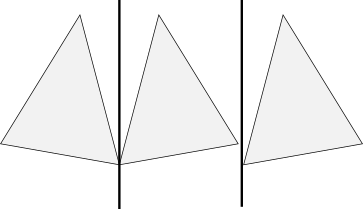

Thus, a translation will be written as a double reflection.

Let $\mathbf a$ be the translation vector, the translation rotor can be written as

$$
T_{\mathbf a} =
\left(
1 + \frac{n_\infty \mathbf a}{2}
\right) =
\left(
1 - \frac{\mathbf a n_\infty}{2}
\right)
=\exp\left(
\frac{ - \mathbf a n_\infty}{2}
\right).
$$

We then have:
$$
T_{\mathbf a} F(\mathbf x) \tilde{T_{\mathbf a}} = F(\mathbf x +\mathbf a).
$$

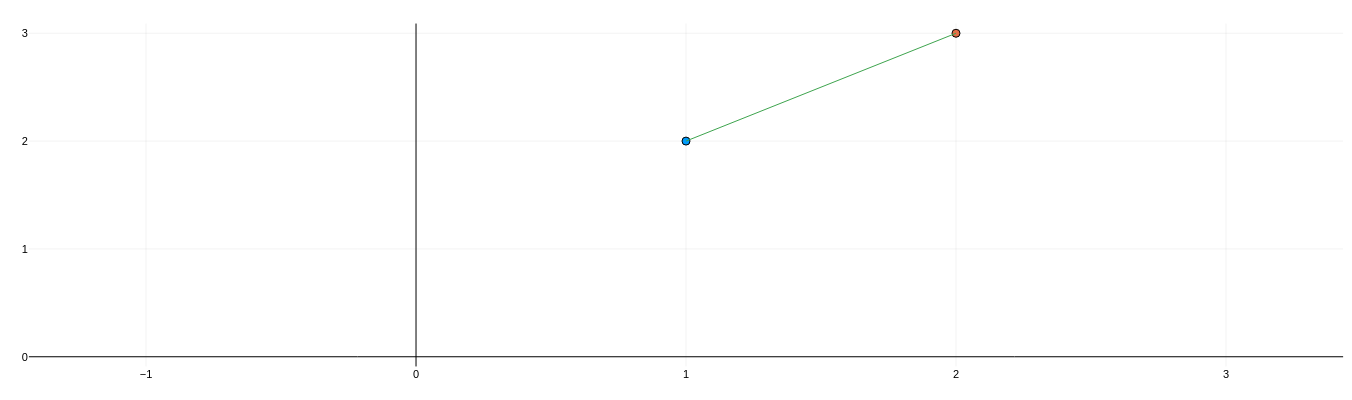

In [23]:
x = cl.e1 + 2cl.e2 + 0cl.e3
a = cl.e1 + cl.e2
Ta = exp(-a*n‚àû/2)

x_t = Ta * F(x) * reverse(Ta)

p1 = scatter([x.e1],[x.e2])
p1 = scatter!([x_t.e1],[x_t.e2],
    framestyle=:zerolines,
    legend=false,
    aspect_ratio=1);
p1 = quiver!([x.e1],[x.e2],quiver=([a.e1],[a.e2]))

## 3.4 Rigid Body Motions and Interpolations

In the Conformal Model, rotors define rigid body motions. Any rotor $V$
can be represented as a rotation followed by translation:
$$
V =  T_\mathbf t R_{\mathbf I \phi} = (1 - \mathbf t \infty / 2)R_{\mathbf I \phi}
= R_{\mathbf I \phi} - \mathbf t R_{\mathbf I \phi} \infty /2.
$$

Thus, given $V$, we can obtain these factors. First, note that
$$
V n_\infty = R_{\mathbf I \phi} n_\infty - \mathbf t R_{\mathbf I \phi} n_\infty \frac{1}{2} n_\infty =
R_{\mathbf I \phi} \infty
$$
Hence,
$$
R_{\mathbf I \phi} = n_o \rfloor (V n_\infty)/2 = -o \rfloor (V \infty)\\
$$

Note, $o \rfloor R = 0$ since $R$ is a rotation rotor, which is defined by the even product of vectors, which
means that $o = 0$ for $R$, and so will be the contraction of $o$ over $R$.
$$
\mathbf t = no \rfloor V / R_{\mathbf I \phi} =-2 (o \rfloor V) / R_{\mathbf I \phi}.
$$


In [24]:
t = 1cl.e1 - 2*cl.e2
œï = œÄ/4
I = cl.e1 ‚àß cl.e2
R  = exp(-I*œï/2)
Tt = exp(-t * n‚àû/2)

V = Tt * R
@show inv(V) ‚âà reverse(V)
@show R - t*R*n‚àû/2 ‚âà V

@show (R - t*R*n‚àû/2)*n‚àû ‚âà R*n‚àû
@show -no ‚®º (R ‚àß n‚àû) ‚âà R;

@show -2(no ‚®º V)/R == t;

inv(V) ‚âà reverse(V) = true
R - (t * R * n‚àû) / 2 ‚âà V = true
(R - (t * R * n‚àû) / 2) * n‚àû ‚âà R * n‚àû = true
-no ‚®º (R ‚àß n‚àû) ‚âà R = true


LoadError: UndefVarError: o not defined

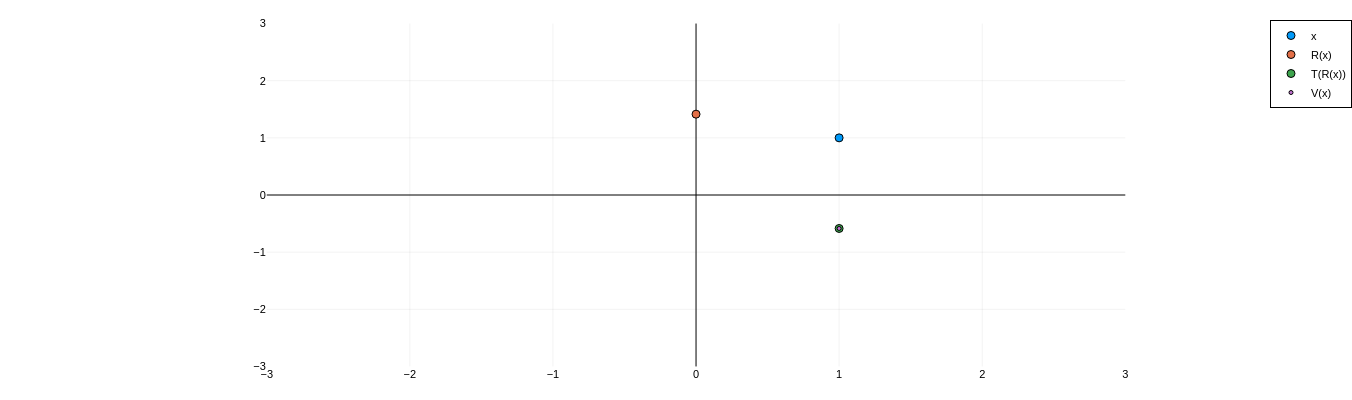

In [25]:
x = F(cl.e1 + cl.e2)
Rx= R*x*reverse(R)
Tx= Tt*Rx*reverse(Tt)
Vx= V*x*reverse(V)

scatter([x.e1],[x.e2],xlims=(-3,3),ylims=(-3,3), aspect_ratio=1,label="x")

scatter!([Rx.e1],[Rx.e2],xlims=(-3,3),ylims=(-3,3), aspect_ratio=1,label="R(x)")
scatter!([Tx.e1],[Tx.e2],xlims=(-3,3),ylims=(-3,3), aspect_ratio=1,label="T(R(x))",
    framestyle=:zerolines)
scatter!([Vx.e1],[Vx.e2],xlims=(-3,3),ylims=(-3,3), aspect_ratio=1,label="V(x)",markersize=2)

## 3.5 Logarithm

Let $V$ be an even versor. We know that $V^n = V V...V$ defines an even
versor that can be used to apply $V$ $n$ times, i.e.
$V^n X \tilde{V^n} = V...V X \tilde{V} ... \tilde{V}$.

Hence, we have:
$$
V^{1/n} = e^{\frac{\log(V)}{n}}
$$

The formula for the logarithm of an even versor is:

$$
\log(T_\mathbf t R_{\mathbf I \phi}) =
-((\mathbf t \wedge \mathbf I) / \mathbf I) \frac{n_\infty}{2}
+ (1 - R^2)^{-1} (\mathbf t \rfloor \mathbf I \phi) \frac{n_\infty}{2} - \mathbf I \phi /2.
$$

In [26]:
function Base.log(V::MultiVector)
    R = - no ‚®º (V * n‚àû)
    t = -2 *(no ‚®º V)/R
    if R ‚âà -cl.ùüè
        throw("no unique logarithm")
    end
    I = grade(R,2)/‚àöscalar(-(grade(R,2)*grade(R,2)))
    œï = -2atan(scalar(grade(R,2)/I), scalar(R))
    
    return (-(t ‚àß I)/I + 1/(1-R*R) * t ‚®º I * œï)*n‚àû/2 - I*œï/2
end

In [27]:
œï = œÄ
I = cl.e1 ‚àß cl.e2
R  = exp(-I*œï/2)
@show R ‚âà cl.e2 / cl.e1

Ir = grade(R,2)/‚àöscalar(-(grade(R,2)*grade(R,2)))

@show Ir ‚âà -I
@show -2atan(scalar(grade(R,2)/Ir), scalar(R)) ‚âà -œï;

R ‚âà cl.e2 / cl.e1 = true
Ir ‚âà -I = true
-2 * atan(scalar(grade(R, 2) / Ir), scalar(R)) ‚âà -œï = true


In [29]:
Rrootn = exp(log(R)/4)

Rrootn * Rrootn * Rrootn * Rrootn ‚âà R

true

## 3.6 Dilations

In [477]:
# exp(Œ±)*F(exp(-Œ±)*x)

# exp(cl.e‚Çä*cl.e‚Çã/2)

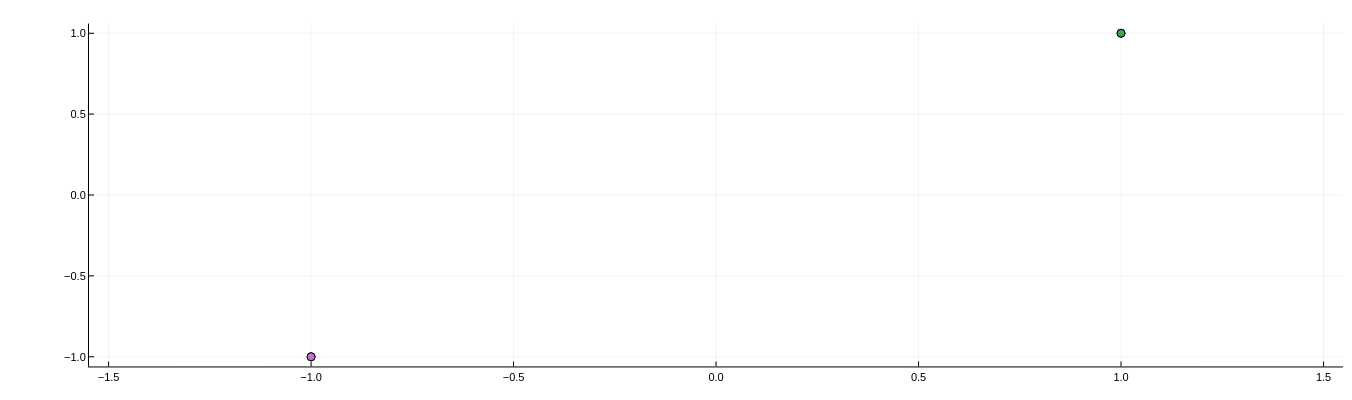

In [478]:
D(Œ±) = exp(Œ±*cl.e‚Çä*cl.e‚Çã/2)
x = cl.e1 + cl.e2
y = -cl.e1 - cl.e2
Œ± = 2
dx = D(Œ±)*F(x)*reverse(D(Œ±))
dy = D(Œ±)*F(y)*reverse(D(Œ±))

p1 = scatter([x.e1],[x.e2])
p1 = scatter!([y.e1],[y.e2],legend=false, aspect_ratio=1)
p1 = scatter!([dx.e1],[dx.e2])
p1 = scatter!([dy.e1],[dy.e2])

In [405]:
exp(-t * ‚àû /2) == exp(-n‚àû * t/2)

true

In [391]:
1 - t*‚àû/2  ‚âà Tt

true

In [381]:
V \

+0.9238795325112867-0.38268343236508984√óe1e2-0.07925633389055353√óe1e‚Çä+1.1152212486938318√óe2e‚Çä+0.07925633389055353√óe1e‚Çã-1.1152212486938318√óe2e‚Çã ‚àà Cl(4, 1, 0)

In [329]:
# V / R ‚âà Tt
# V / R
o ‚®º (R*‚àû)

-0.9238795325112867+0.38268343236508984√óe1e2 ‚àà Cl(4, 1, 0)

In [330]:
R

+0.9238795325112867-0.38268343236508984√óe1e2 ‚àà Cl(4, 1, 0)

In [355]:
-2(o ‚®º V) / R

+1.0√óe1 ‚àà Cl(4, 1, 0)

In [304]:
(no ‚®º V) / R

-1.0√óe1 ‚àà Cl(4, 1, 0)

In [289]:
R*n‚àû == R‚àßn‚àû


true

In [233]:
-no ‚®º (V*n‚àû)

-1.8477590650225735+0.7653668647301797√óe1e2 ‚àà Cl(4, 1, 0)